
# **Medikal Maliyet Analizi**
Veri seti kaggle linki: https://www.kaggle.com/datasets/mirichoi0218/insurance


In [76]:
#Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
#insurance.csv dosyasının okunması
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
df.shape

(1338, 7)

In [79]:
#null değeri için kontrol
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


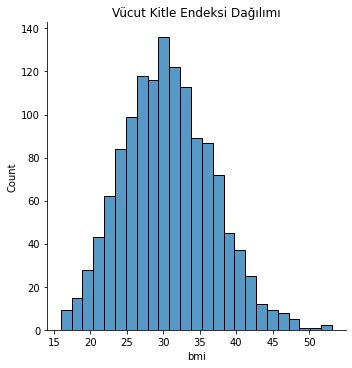

In [80]:
#Vücut Kitle Endeksi Dağılımı
sns.displot(df['bmi'])
plt.title('Vücut Kitle Endeksi Dağılımı')
plt.show()

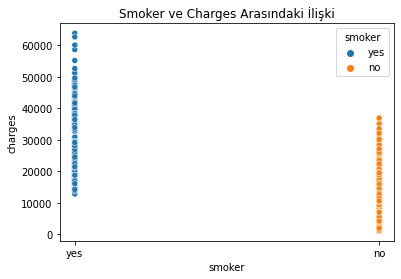

In [81]:
#Smoker ve Charges Arasındaki ilişki
sns.scatterplot(data=df, x="smoker", y="charges", hue="smoker")
plt.title('Smoker ve Charges Arasındaki İlişki')
plt.show()

Smoker, Region ve Cinsiyet değişkenleri text olduğu için labelEncoder kullanarak sayıya çevirme işlemi gerçekleştirdim.

In [82]:
# cinsiyet değişkeninin 0 ve 1 sayılarına donüştürülmesi
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [83]:
# sigara değişkeninin 0 ve 1 sayılarına donüştürülmesi
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [84]:
# bölge değişkeninin 0, 1, 2 ve 3 sayılarına donüştürülmesi
df['region'] = labelencoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


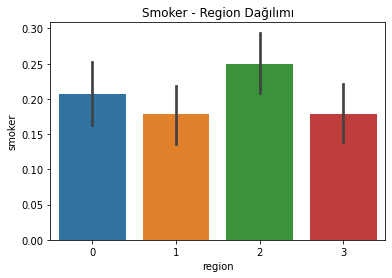

In [85]:
#Smoker - Region Dağılımı
sns.barplot(x="region", y="smoker", data=df)
plt.title('Smoker - Region Dağılımı')
plt.show()

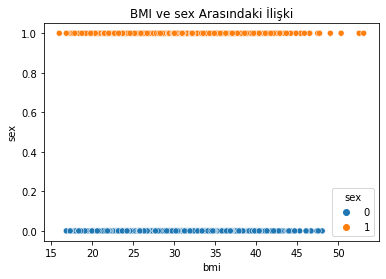

In [86]:
#BMI ve sex Arasındaki ilişki
sns.scatterplot(data=df, x="bmi", y="sex", hue="sex")
plt.title('BMI ve sex Arasındaki İlişki')
plt.show()

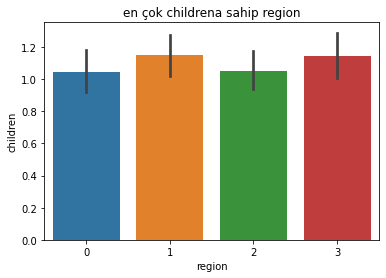

In [87]:
#en çok children'a sahip region
sns.barplot(x="region", y="children", data=df)
plt.title('en çok childrena sahip region')
plt.show()

1 ve 3 numaralı bölgeler eşit ve en çok çocuğa sahip bölgeler.

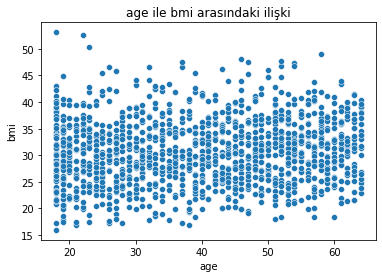

In [88]:
# age ile bmi arasındaki ilişki
sns.scatterplot(data=df, x="age", y="bmi")
plt.title('age ile bmi arasındaki ilişki')
plt.show()

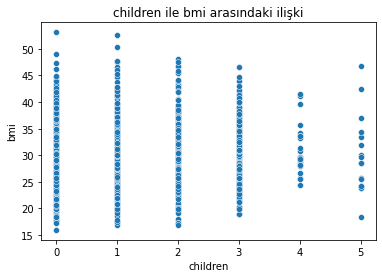

In [89]:
# children ile bmi arasındaki ilişki
sns.scatterplot(data=df, x="children", y="bmi")
plt.title('children ile bmi arasındaki ilişki')
plt.show()

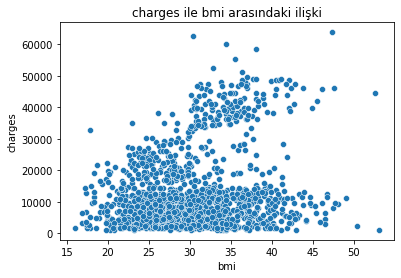

In [90]:
# bmi ile charges arasındaki ilişki
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title('charges ile bmi arasındaki ilişki')
plt.show()

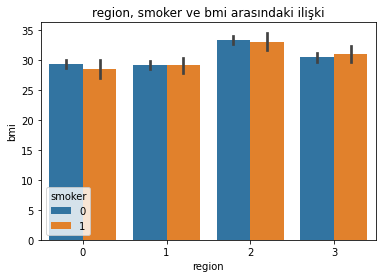

In [91]:
#region, smoker ve bmi arasındaki ilişki
sns.barplot(x="region", y="bmi",  hue="smoker", data=df)
plt.title('region, smoker ve bmi arasındaki ilişki')
plt.show()

In [92]:
#bağımlı ve bağımsız değişkenleri ayırma
x = df.drop(columns='charges', axis=1)
y = df.charges

In [93]:
#verileri eğitim ve test olarak bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1338, 6) (936, 6) (402, 6)
(1338,) (936,) (402,)


In [94]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train.values, y_train.values)

LinearRegression()

In [95]:
x_train_pred = regression.predict(x_train.values)

In [96]:
from sklearn import metrics

r2_train = metrics.r2_score(y_train, x_train_pred)

print('R squared value: ',r2_train)

R squared value:  0.7423324422449182


In [97]:
x_test_pred = regression.predict(x_test.values)

r2_test = metrics.r2_score(y_test, x_test_pred)

print('R squared value: ',r2_test)

R squared value:  0.7655024146458023
